In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [13]:
import copy

In [31]:
with open('test_cases/casef_20240925_175552_mod3.json', 'r') as file:
    data = json.load(file)

In [32]:
max_delay = 4

In [33]:
for fl in data["flights"]:
    dr = {}
    for j, r in enumerate(data["flights"][fl]["requests"]):
        if(r=='000'):
            dr['000'] = copy.deepcopy(data["flights"][fl]["requests"][r])
            dr['000']['delay'] = 0
            continue
        for i in range(max_delay + 1):
            k = copy.deepcopy(data["flights"][fl]["requests"][r])
            k["request_departure_time"] += i
            k["request_arrival_time"] += i
            k["bid"] *= pow(0.95,i)
            k["valuation"] *= pow(0.95,i)
            k["delay"] = i
            id_ = str(1 + (j-1)*(max_delay+1) + i)
            s = '0' * (3 - len(id_)) + str(id_)
            dr[s] = k
    data["flights"][fl]["requests"] = dr

In [34]:
data

{'timing_info': {'start_time': 1,
  'end_time': 101,
  'time_step': 1,
  'auction_frequency': 100},
 'fleets': {'F001': {'members': ['AC005'], 'rho': 1},
  'F002': {'members': ['AC015'], 'rho': 1},
  'F003': {'members': ['AC007'], 'rho': 1},
  'F004': {'members': ['AC020'], 'rho': 1},
  'F005': {'members': ['AC016'], 'rho': 1},
  'F006': {'members': ['AC012'], 'rho': 1},
  'F007': {'members': ['AC004'], 'rho': 1},
  'F008': {'members': ['AC009'], 'rho': 1},
  'F009': {'members': ['AC002'], 'rho': 1},
  'F010': {'members': ['AC013'], 'rho': 1},
  'F011': {'members': ['AC010'], 'rho': 1},
  'F012': {'members': ['AC001'], 'rho': 1},
  'F013': {'members': ['AC018'], 'rho': 1},
  'F014': {'members': ['AC008'], 'rho': 1},
  'F015': {'members': ['AC011'], 'rho': 1},
  'F016': {'members': ['AC006'], 'rho': 1},
  'F017': {'members': ['AC017'], 'rho': 1},
  'F018': {'members': ['AC019'], 'rho': 1},
  'F019': {'members': ['AC014'], 'rho': 1},
  'F020': {'members': ['AC003'], 'rho': 1}},
 'congest

In [57]:
lats = []
lons = []
for i in data["vertiports"].keys():
    lats += [data["vertiports"][i]["latitude"]]
    lons += [data["vertiports"][i]["longitude"]]

In [58]:
minlat = min(data["gridBounds"][0]["lat"],data["gridBounds"][1]["lat"])
minlon = min(data["gridBounds"][0]["lng"],data["gridBounds"][1]["lng"])
maxlat = max(data["gridBounds"][0]["lat"],data["gridBounds"][1]["lat"])
maxlon = max(data["gridBounds"][0]["lng"],data["gridBounds"][1]["lng"])

In [59]:
data["flights"]["AC001"]["allocated_request"] = "002"
data["flights"]["AC001"]["allocated_request"] = "002"
data["flights"]["AC001"]["allocated_request"] = "001"

In [60]:
def get_latlon(frame, flight_id):
    
    origin_vp = data["flights"][flight_id]["origin_vertiport_id"]
    
    o_lat = data["vertiports"][origin_vp]["latitude"]
    o_lon = data["vertiports"][origin_vp]["longitude"]
    
    alloc = data["flights"][flight_id]["allocated_requests"]
    dest_vp = data["flights"][flight_id]["requests"][alloc]["destination_vertiport_id"]
    
    d_lat = data["vertiports"][dest_vp]["latitude"]
    d_lon = data["vertiports"][dest_vp]["longitude"]
    
    dep_time = data["flights"][flight_id]["requests"][alloc]["request_departure_time"]
    arr_time = data["flights"][flight_id]["requests"][alloc]["request_arrival_time"]
    t = arr_time - dep_time
    k = 0
    if(frame < dep_time):
        k = 1
    elif(frame>arr_time):
        k = 0
    else:
        k = (frame-dep_time) / (arr_time - dep_time)
    
    fin_lat = o_lat * k + d_lat * (1-k)
    fin_lon = o_lon * k  + o_lat * (1-k)
    return fin_lat, fin_lon


In [61]:
flight_lat = []
flight_lon = []
for i in data["flights"]:
    origin_vp = data["flights"][i]["origin_vertiport_id"]
    lat = data["vertiports"][origin_vp]["latitude"]
    lon = data["vertiports"][origin_vp]["longitude"]
    flight_lat += [lat]
    flight_lon += [lon]

In [62]:
flight_lat, flight_lon

([37.853882, 37.45649, 37.327743], [-122.261697, -122.44843, -121.89647])

In [64]:
bg = plt.imread("test_cases/gui_v1.png")

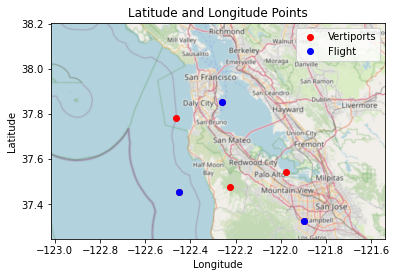

In [69]:
fig, ax = plt.subplots()
plt.scatter(lons, lats, color='red', label='Vertiports')

# Set the axis limits according to the grid bounds
plt.xlim(minlon, maxlon)
plt.ylim(minlat, maxlat)

# Add labels and a title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Simulation')


animated_points = ax.plot(flight_lon, flight_lat, 'bo', label='Flight')
ax.imshow(bg,extent=[minlon, maxlon, maxlat, minlat], origin='lower')


def update(frame):
    new_lat = []
    new_lon = []
    for i in data["flights"]:
        lat_,lon_ = get_latlon(frame, i)
        new_lat += [lat]
        new_lon += [lon]
    animated_points.set_data(new_lon, new_lat)
    print(frame)

ani = FuncAnimation(fig, update, frames=data["timing_info"]["end_time"], interval=50)

# Show the plot
plt.legend()
plt.show()

In [ ]:
data

In [ ]:
lats = 